lab3

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)


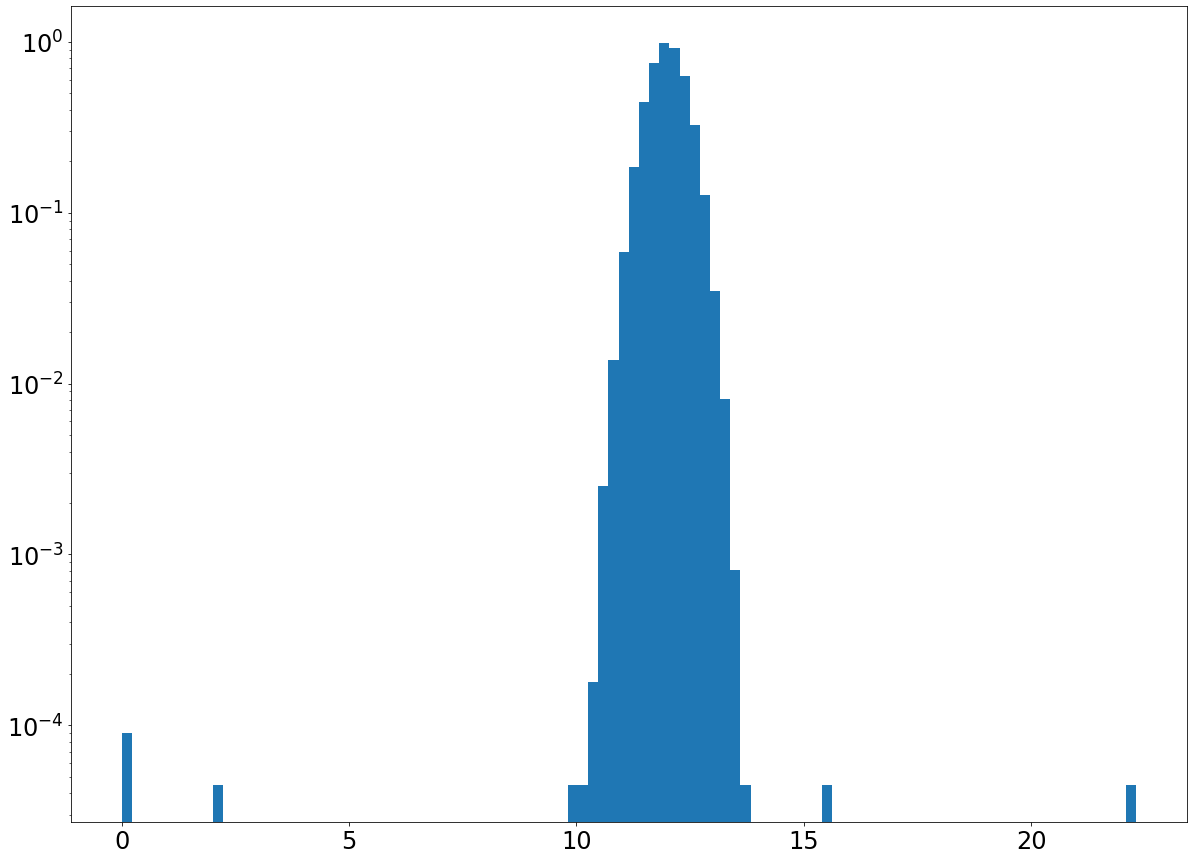

In [42]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()


A) So our goal is to identify bad data and throw it out.

1.Start by exploring the data you have created with appropriate plots

2.State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.

3.Restate your question in math. Be very clear.

4.Apply your statistical test and construct a truth table.

The idea is how often you kept the known good data (True T & Your Test Good), how often you correctly discarded bad data (Bad T & Your Test Bad), and how often mistakes were made of either omission or commission (off diagonals).



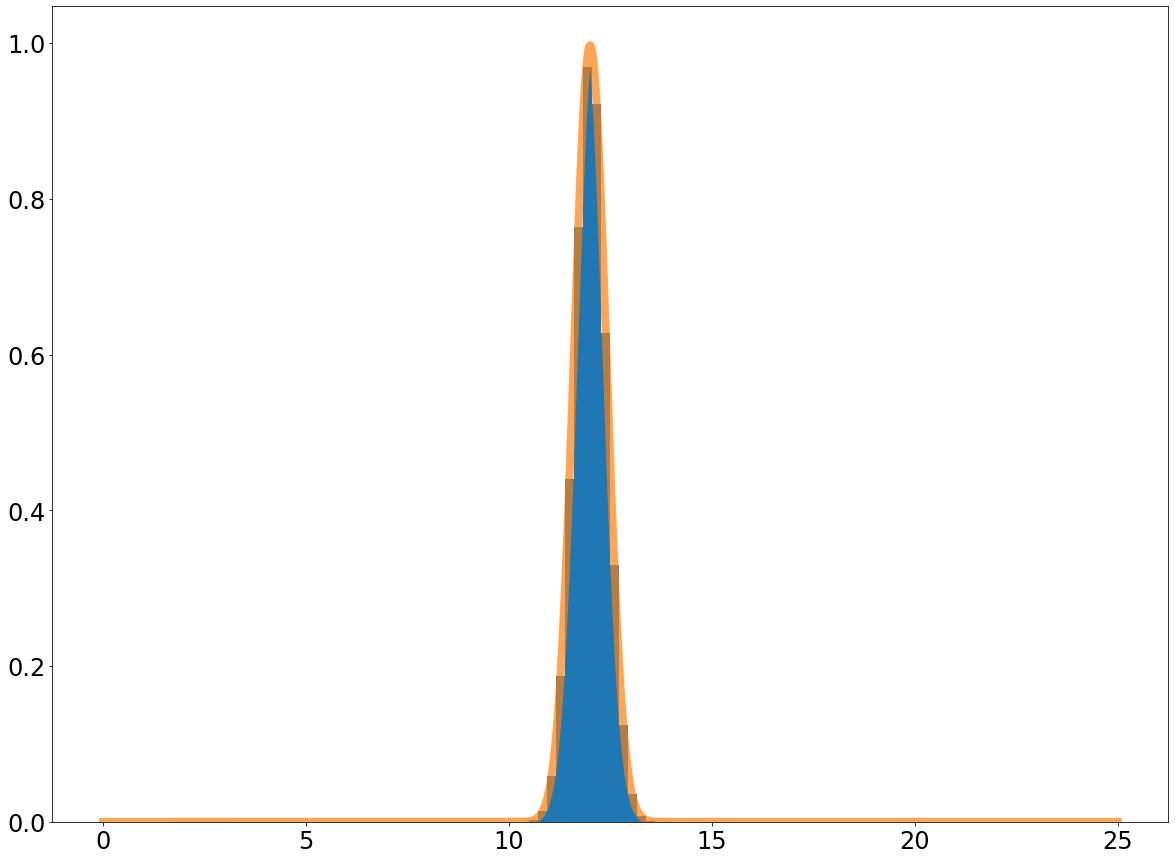

In [37]:
#1.Start by exploring the data you have created with appropriate plots
gausx = np.linspace(0, 25, 100000)
gausy = stats.norm.pdf(gausx, loc=12, scale=0.4)
plt.hist(d, 100, density=True)
plt.tick_params(labelsize = 24)

plt.plot(gausx, gausy, linewidth=8, alpha=0.7, label="True Gaussian")




statistical question in word
with the mean as 12 K and sd of 0.4, what is the possibilty that my measurement are not considered outlier(don't exceed 3 sigma)

Restate question in math
$P(X) =  \int_{-\infty}^{X-12}\frac{1}{0.4 *2\pi}e^{\frac{-1}{2} (\frac{x-12}{0.4})^2} +  \int_{12-X}^\infty\frac{1}{0.4 *2\pi}e^{\frac{-1}{2} (\frac{x-12}{0.4})^2}$





In [38]:
#truth table with 3 sigma
out_liers = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
threshold = 3*0.4
good_kept = 0
good_throw = 0
bad_kept = 0
bad_throw = 0

for i in range(len(d)):
    if (abs(12.-d[i]) >= threshold):#test bad
        if d[i] in out_liers[:]:
            bad_kept = bad_kept+1
        else:
            bad_throw = bad_throw+1
    else: # test good 
        if d[i] in out_liers[:]:
            good_kept = good_kept+1
        else:
            good_throw = good_throw+1

print("Good kept: ", good_kept, "\nGood throw: ", good_throw)
print("Bad kept: ", bad_kept, "\nBad throw: ", bad_throw)


Good kept:  1 
Good throw:  99751
Bad kept:  7 
Bad throw:  249


|                | True T | Bad T |
|---------------:|:------:|-------|
| Your Test Good |  99760 | 1     |
|  Your Test Bad |    240 | 7     |


B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

As the threshold increase, the number of omissions will decrease. It is predictable since it is close to Gaussian.

C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

Yes there should be mistakes. The threshold is set to be 3 sigma. If we decrease the threshold, the mistakes will also decrease.



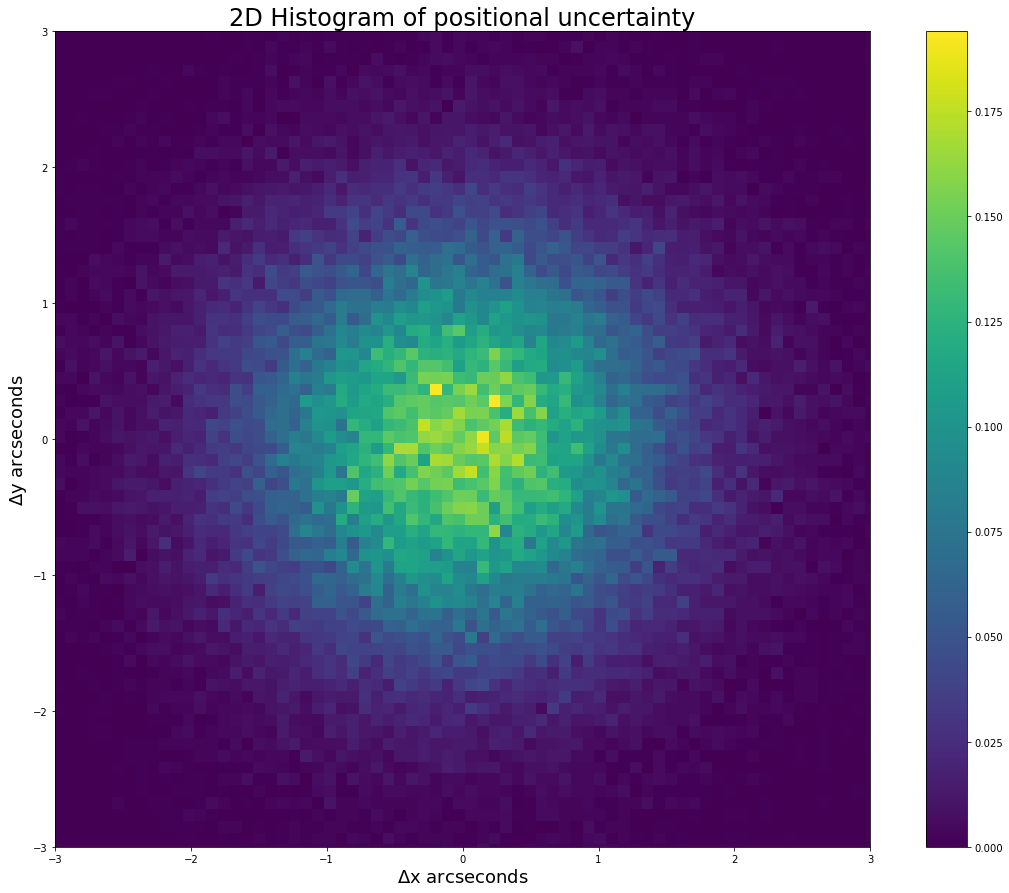

In [40]:
#Problem 2

a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)


What is the question in words?

With 1 arcsecond RMS, how far all the (stationary) stars appear to have moved that are 5 sigma away from center of the graph.

What is the question in math? 
$P =  \int_{5}^{\infty} pdf(x, \sigma)dx $

What distance in arcseconds represents a 5 sigma detection of motion?


In [44]:
#adding two Gaussians x and y is a Rayleigh distribution.
prob = stats.norm.cdf(5)
value = stats.rayleigh.ppf(prob)
print(value)

5.489079776034238


Problem 3
What is the question in words?
If we can observe where the moon is for 8 hours per night and we observe for 15 days, this give us a average of 7200 cosmic rays. What is the signficance of our moon shadow detection of 6800 cosmic rays?

Translate the question to math, describing both the expected background pdf() and the integral you need to do.

$P= \int_ {-\infty}^{6800} pdf(x, \sigma) dx$



In [47]:
prob = stats.poisson.cdf(6800,7200)
value = stats.norm.ppf(prob)
print(value)

-4.750747965777188
